# Iris Flowers Classification

## Table of contents

1. [Introduction](#intro)
2. [Iris Data Set](#data)
3. [Pre-processing](#pre-processing)
4. [Classification Models](#models)
    - [K Nearest Neighbours](#KNN)
    - [Decision Tree](#decision-tree)
    - [Support Vector Machine](#SVM) 
    - [Logistic Regression](#LR)  


5. [Results and Discussion](#results)
6. [Conclusion](#conclusion)

## Introduction:<a name="intro"></a>

**Iris** is a genus of around 300 species of flowering plants. It takes the name from the Greek goddess of rainbow, *Iris*. 

The **Iris flower data set** is also know as the **Fisher's Iris data set**. It is a multivariate data set introduced by Ronald Fisher in his paper, **The use of multiple measurements in taxonomic problems** as an example of linear discriminant analysis.


The data set is available at https://archive.ics.uci.edu/ml/datasets/iris, the errors are modified as well. It consists the following information for 150 samples,

1. sepal length (in cm)
2. sepal width (in cm)
3. petal length (in cm)
4. petal width (in cm)
5. class:
    - Iris Setosa
    - Iris Versicolour
    - Iris Virginica
    
Download and save the dataset into the same folder as this program.

**Classification models** can be used to predict the dependent variable (**_class of each flower_**). Here we are going to use 4 different algorithms for classification namely, **K-Nearest Neighbours**, **Decision Tree**, **Support Vector Machine** and **Linear Regression**. Atlast we compare their accuracy to find the suitable classification technique for this problem. The given dataset is seperated into two seperate train and test sets. The train set is used to train the model, and the test set is used to predict the accuracy of each model. Finally, we compare the results.


### Import required libraries:

In [1]:
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import jaccard_similarity_score, f1_score, log_loss

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

print("Libraries Imported.")

Libraries Imported.


## Iris Data Set:<a name="data"></a>

In [2]:
#define the column names for the pandas dataframe
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'iris_class']

#load the csv file into a new pandas dataframe
iris_df = pd.read_csv('iris_data.csv', names = column_names, header = None)

In [3]:
print(iris_df.shape)
iris_df.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,iris_class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_df['iris_class'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: iris_class, dtype: int64

The datset consists of **150 samples** in total. Each class of iris flowers consists of **50 samples each**.

## Pre-processing:<a name="pre-processing"></a>

### Define input and output variables:

In [5]:
#Load the input variables into X

X = iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [6]:
#Load the output variable into y

y = iris_df['iris_class'].values
y[0:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

### Split datset into train and test sets:

Let us consider 70% data for training and 30% of data for testing.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (105, 4) (105,)
Test set: (45, 4) (45,)


In [8]:
np.unique(y_test, return_counts=True)

(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object),
 array([17, 14, 14], dtype=int64))

### Normalize the feature set X_train and X_test:

In [9]:
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train.astype(float))
X_train[0:5]

array([[ 0.68955032,  0.29978535,  0.38919985,  0.37287433],
       [-0.96174124,  0.536458  , -1.22696903, -0.9588197 ],
       [ 0.18146061, -0.88357788,  0.73552176,  0.50604373],
       [-0.07258424, -0.88357788,  0.73552176,  0.90555194],
       [-0.58067396, -0.17355994,  0.38919985,  0.37287433]])

In [10]:
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))
X_test[0:5]

array([[-1.33519891,  0.39233578, -1.21491142, -1.22307682],
       [-1.33519891,  0.17437146, -1.15968817, -1.22307682],
       [-0.45323266,  0.82826443, -1.15968817, -0.96588777],
       [-0.89421579, -0.04359286, -1.10446493, -1.22307682],
       [-0.12249531,  3.00790765, -1.15968817, -0.96588777]])

## Function to plot the confusion matrix:

Let us define a function that plots the confusion matrix for the classification models. The predicted values, yhat from each model is given as an argument to the plot function.

In [11]:
def confusion_matrix_plot(yhat):
    labels = ['Iris-virginica', 'Iris-setosa', 'Iris-versicolor']

    matrix = confusion_matrix(yhat, y_test, labels=labels)

    fig, ax = plt.subplots(figsize=(8,6))
    ax = sns.heatmap(matrix, annot = True, xticklabels = labels, yticklabels = labels, cmap = "Blues")
    ax.set_title("Confusion Matrix", fontsize=18)
    ax.set_xlabel("Predicted", fontsize=14)
    ax.set_ylabel("Actual", fontsize=14)

# Classification Models:<a name="models"></a>

## K Nearest Neighbours:<a name="KNN"></a>

Since we know that there are 3 classes of iris flowers, we fix the **k value to 3**.

In [12]:
#Create an instance of the KNN classifier with k = 3
neigh = KNeighborsClassifier(n_neighbors = 3)

#Fit the model with the training data X_train and y_train
neigh.fit(X_train,y_train)

#Use the test data X_test to predict the output, yhat_KNN
yhat_KNN = neigh.predict(X_test)

#Use the real values y_test and the predicted values yhat_KNN to find the accuracy of the model 
print("Accuracy of the KNN model: ", accuracy_score(y_test, yhat_KNN))

Accuracy of the KNN model:  0.9111111111111111


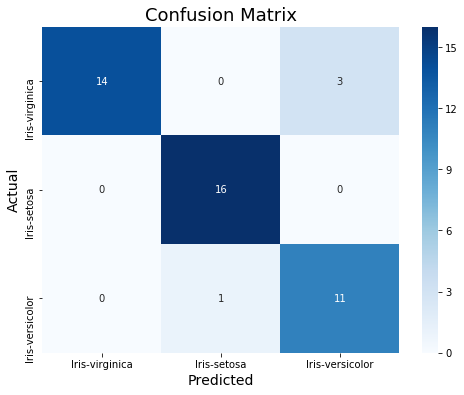

In [13]:
#Plot the confusion matrix. Use the predicted values, yhat_KNN as the attribute.
confusion_matrix_plot(yhat_KNN)

**41 samples** from the 45 test samples were predicted correctly, which is an accuracy of **91.11%**

In [14]:
#Use the real values y_test and the predicted values yhat_KNN to estimate the Jaccard Similarity Score and the F1-Score.
print("Jaccard Similarity Score: ", jaccard_similarity_score(y_test, yhat_KNN))
print("                f1_score: ", f1_score(y_test, yhat_KNN, average='weighted'))

Jaccard Similarity Score:  0.9111111111111111
                f1_score:  0.9105814138072204


## Decision Tree:<a name="decision-tree"></a>

In [15]:
#Create an instance of the decision tree classifier
dec_tree = DecisionTreeClassifier(criterion="entropy")

#Fit the model with the training data X_train and y_train
dec_tree.fit(X_train, y_train)

#Use the test data X_test to predict the output, yhat_tree
yhat_tree = dec_tree.predict(X_test)

#Use the real values y_test and the predicted values yhat_tree to find the accuracy of the model 
print("Accuracy of the Decision Tree: ", accuracy_score(y_test, yhat_tree))

Accuracy of the Decision Tree:  0.9333333333333333


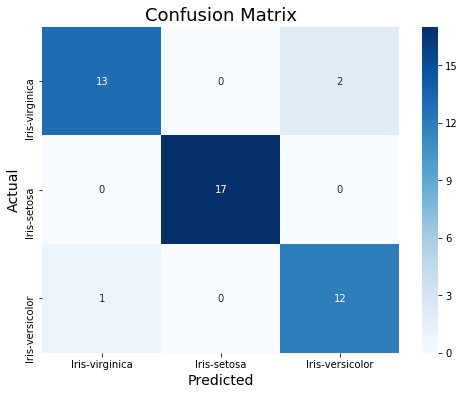

In [16]:
#Plot the confusion matrix. Use the predicted values, yhat_tree as the attribute.
confusion_matrix_plot(yhat_tree)

**42 samples** from the 45 test samples were predicted correctly, which is an accuarcy of **93.33%**

In [17]:
#Use the real values y_test and the predicted values yhat_tree to estimate the Jaccard Similarity Score and the F1-Score.
print("Jaccard Similarity Score: ", jaccard_similarity_score(y_test, yhat_tree))
print("                f1_score: ", f1_score(y_test, yhat_tree, average='weighted'))

Jaccard Similarity Score:  0.9333333333333333
                f1_score:  0.933248190719455


## Support Vector Machine:<a name="SVM"></a>

In [18]:
#Create an instance of the svm classifier using the kernel function, rbf (Radial Basis Function)
svm_model = svm.SVC(kernel='rbf', gamma = 'auto')

#Fit the model with the training data X_train and y_train
svm_model.fit(X_train, y_train)

#Use the test data X_test to predict the output, yhat_svm
yhat_svm = svm_model.predict(X_test)

#Use the real values y_test and the predicted values yhat_svm to find the accuracy of the model 
print("Accuracy of the SVM Model :", accuracy_score(y_test, yhat_svm))

Accuracy of the SVM Model : 0.9111111111111111


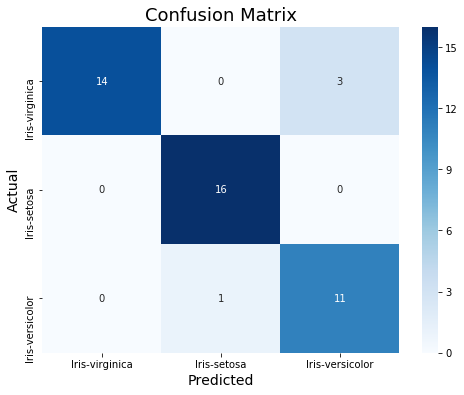

In [19]:
#Plot the confusion matrix. Use the predicted values, yhat_svm as the attribute.
confusion_matrix_plot(yhat_svm)

**41 samples** from the 45 test samples were predicted correctly, which is an accuarcy of **84.44%**

In [20]:
#Use the real values y_test and the predicted values yhat_svm to estimate the Jaccard Similarity Score and the F1-Score.
print("Jaccard Similarity Score: ", jaccard_similarity_score(y_test, yhat_svm))
print("                f1_score: ", f1_score(y_test, yhat_svm, average='weighted'))

Jaccard Similarity Score:  0.9111111111111111
                f1_score:  0.9105814138072204


## Logistic Regression:<a name="LR"></a>

In [21]:
#Create an instance of the Logistic Regression classification model
#using the 'liblinear' optimizer and set C, the Inverse of regularization strength to 0.01
LR = LogisticRegression(C=0.01, solver='liblinear')

#Fit the model with the training data X_train and y_train
LR.fit(X_train,y_train)

#Use the test data X_test to predict the output, yhat_LR
yhat_LR = LR.predict(X_test)

#Use the real values y_test and the predicted values yhat_LR to find the accuracy of the model 
print("Accuracy of the SVM Model :", accuracy_score(y_test, yhat_LR))

Accuracy of the SVM Model : 0.8444444444444444


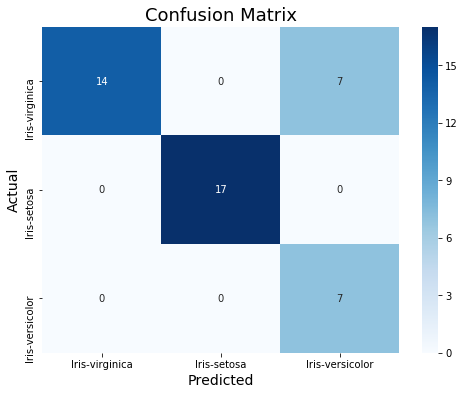

In [22]:
#Plot the confusion matrix. Use the predicted values, yhat_LR as the attribute.
confusion_matrix_plot(yhat_LR)

**38 samples** from the 45 test samples were predicted correctly, which is an accuarcy of **84.44%**

In [23]:
#predict_proba returns estimates for all classes, ordered by the label of classes. It is used to compute the Log Loss.
yhat_prob_LR = LR.predict_proba(X_test)

In [24]:
#Use the real values y_test and the predicted values yhat_LR to estimate the Jaccard Similarity Score, F1-Score and the Log Loss.
print("Jaccard Similarity Score: ", jaccard_similarity_score(y_test, yhat_LR))
print("                f1_score: ", f1_score(y_test, yhat_LR, average='weighted'))
print("                Log Loss: ", log_loss(y_test, yhat_prob_LR))

Jaccard Similarity Score:  0.8444444444444444
                f1_score:  0.8340740740740741
                Log Loss:  0.8385626394846017


## Results and Discussion:<a name="results"></a>

### Accuracy Comparison:

| Algorithm               |  Jaccard Similarity Score  |  F1 score  |  Log Loss  |
|-------------------------|----------------------------|------------|------------|
| K Nearest Neighbour     | 0.91                       | 0.91       | NA         |
| Decision Tree           | 0.93                       | 0.93       | NA         |
| Support Vector Machine  | 0.91                       | 0.91       | NA         |
| Logistic Regression     | 0.84                       | 0.83       | 0.84       |

Comparing the scores and accuarcy of each model, it is seen the **Decision Tree** classification algorithm provides the highest accuracy for this problem using the Iris Data Set.

It is always the best practice to train the model using the complete dataset i.e. not to waste any part of the available data.


### Model the complete Dataset using the best classifier:

In this case it is the, **Decision** classification algorithm.

In [25]:
#Create an instance of the decision tree classifier
final_model = DecisionTreeClassifier(criterion="entropy")

#Fit the model with the complete data set X and y
final_model.fit(X, y)

#Training set accuracy of the model
yhat_final = final_model.predict(X)
print("Training set accuracy of the Final Decision Tree Model :", accuracy_score(y, yhat_final))

Training set accuracy of the Final Decision Tree Model : 1.0


## Conclusion:<a name="conclusion"></a>

The purpose of this project was to compare different classification algorithms to predict the class of the iris flowers. Find and compare the accuracy of each model to find the best classifier. Finally train the model using the complete dataset.

The **final_model** computed here can be used to predict the class of the iris flowers as **Iris Setosa (or) Iris Versicolour (or) Iris Virginica** given its attribute information namely the **sepal length, sepal width, petal length and petal width** values in centimeter.

[Refer here](https://github.com/rohithaug/iris-flower-classification/blob/master/iris_decision_tree.ipynb) for the code to visualize the Decision Tree Model.

## Thank you

I hope you found the project useful and interesting. Feel free to contact me if you have any queries or suggestions.

This notebook was developed by [Rohith S P](https://www.linkedin.com/in/rohithsp/). 